# Funciones y Namespaces


## 1. Funciones

Una función es un bloque de código que sólo corre cuando es llamado.

In [ ]:
def par_o_impar(numero):
    if numero %2 == 0:
        print('Es par')
    else:
        print('Es impar')

Notar que si ejecutamos la celda no ocurre nada apreciable. Si llamamos a la función

In [ ]:
par_o_impar

<function __main__.par_o_impar>

Python nos dice, de una forma no muy clara, que se trata de una función. Las funciones se llaman con paréntesis:

In [ ]:
par_o_impar()

TypeError: ignored

Y en este caso, arroja un error porque falta un argumento, `numero`. Las dos siguientes son equivalentes:

In [ ]:
import pandas as pd

par_o_impar(numero = 9)
par_o_impar(9)
pd.DataFrame([55,10.56,100,150,9850])[0].map(par_o_impar)

Es impar
Es impar


TypeError: ignored

Al tener un solo argumento, en este caso no hay mucho lugar a confusión, pero las funciones pueden tener muchos argumentos:

In [ ]:
def division(dividendo, divisor):
    print(dividendo/divisor)

Entonces podemos llamar a la función pasándole los argumentos en orden, o explicitando el valor de cada argumento:

In [ ]:
division(4,2)
division(divisor = 4, dividendo = 2)  #notar que asi no nos tenemos que preocupar por el orden
#ahora si importa el orden, al menos en mi python XD
division(dividendo = 4, divisor = 2)

2.0
0.5
2.0


También, pueden tener argumentos *por default*, que si no explicitamos, toman un valor predefinido:

In [ ]:
def division(dividendo, divisor = 2):
    print(dividendo/divisor)

In [ ]:
division(9)
division(9, 3) 
division(dividendo = 9, divisor = 3) 
division(9, divisor = 3) 

4.5
3.0
3.0
3.0


### 1.1 `return`

Las funciones pueden devolver resultados

In [ ]:
def division(dividendo, divisor = 2):
    variable_auxiliar = dividendo/divisor
    return variable_auxiliar

In [ ]:
resultado_division = division(9,3)

In [ ]:
print(resultado_division)

3.0


Y, si lo necesitamos, podemos hacer que devuelvan más de un resultado

In [ ]:
def division_y_producto(numero_1,numero_2):
    div = numero_1/numero_2
    prod = numero_1*numero_2
    return div, prod

### Son equivalentes
# def division_y_producto(numero_1,numero_2):
#     return numero_1/numero_2, numero_1*numero_2

In [ ]:
resultados = division_y_producto(10,5)
print(resultados)

(2.0, 50)


Notar la diferencia

In [ ]:
resultado_1, resultado_2 = division_y_producto(10,5)
print(resultado_1, resultado_2)
#uno devuelve una tupla y el otro un objeto?

2.0 50


### 2. Namespaces and Scope

Encontrar la diferencia entre las siguientes celdas:

In [ ]:
def division(dividendo, divisor = 2):
    variable_auxiliar = dividendo/divisor
    return variable_auxiliar
print(division(50))
print(divisor)



25.0
5


In [ ]:
divisor = 5
def division(dividendo):
    variable_auxiliar = dividendo/divisor
    return variable_auxiliar
print(division(50))
print(divisor)
#divisor es una variable externa, ingresa a la memoria de 
#la maquina

10.0
5


In [ ]:
divisor = 5
def division(dividendo, divisor = 2):
    variable_auxiliar = dividendo/divisor
    return variable_auxiliar
print(division(50))
print(divisor)

25.0
5


**Investigar:** 
¿qué es una variable global?¿Y una variable local?

 Una variable local se declara en su ámbito de uso (en el programa principal y dentro de una función) y una global fuera de su ámbito para que se pueda utilizar en cualquier función que la declare como global.


¿Qué es un Namespace?
Un espacio de nombres “Namespace”(a veces también llamado ámbito de nombres “name scope”) es un contenedor abstracto o el entorno creado para alojar una agrupación lógica de identificadores únicos o símbolos (por ejemplo, nombres).

https://python-para-impacientes.blogspot.com/2014/02/variables-locales-y-variables-globales.html

In [ ]:
#EJEMPLO VARIABLE LOCAL Y GLOBAL
# Define función
def acelerar():
    # Declara la variable 'km' como global
    # Ahora se podrá utilizar dentro de la función
    global km
    
    # Declara variable local (ámbito función)
    tiempo = 1

    # Se incrementa la velocidad en 5 km
    km+= 5

# Define variable local (ámbito programa principal)
km = 10

# Muestra variable 'km'
print('Velocidad:', km)  # velocidad: 10

# Llama a la función acelerar()
acelerar()

# Muestra variable 'km'
print('Velocidad:', km)  # velocidad: 15

# Intenta mostrar la variable 'tiempo'
# Se produce una excepción (error) de tipo NameError
# porque la variable no pertenece a este ámbito:
# NameError: name 'tiempo' is not defined
print('Tiempo:', tiempo)



##NAMESPACE

# var1 is in the global namespace  
var1 = 5
def some_func(): 
  
    # var2 is in the local namespace  .. son variables internas de funciones
    var2 = 6
    def some_inner_func(): 
  
        # var3 is in the nested local  ... se utilizan para ejecutar de la funcion, luego se destruyen cuando termina la ejecucion.
        # namespace 
        var3 = 7


### 3. Funciones Lambda (Anónimas)

Una función `lambda` es una forma conveniente de crear una función en una sola línea. También se las conoce como funciones anónimas, ya que no suelen tener nombre.

In [ ]:
lambda_division = lambda x,y: x/y
lambda_division(80,10)

Algunas características:
1. Pueden tener cualquier cantidad de argumentos, pero solo una expresión
1. No se les suele poner nombre como hicimos, de hecho es raro utilizarlas de esa forma./
1. No necesitan un `return`
1. Muy cómodas para crear funciones rápido.
1. En general, las veras combinadas con funciones como `map()`, `filter()`, `apply()`, `applymap()`, etc.

Existen algunas diferencias sutiles entre una función creada con `def` y una función lambda, pero para nuestros objetivos basta con saber que una función lambda es una forma rápida de crear funciones sencillas.

### 4. Documentando funciones

Cuando creemos funciones es conveniente documentarlas, así si volvemos meses después a nuestro código, o se lo compartimos a alguien, podemos entender qué hace sin tener que leer y entenderlo completamente. Es decir, de la misma forma que hacemos con muchas de las funciones de las librerías que venimos usando. Hay muchos formatos para documentar una función, pero en general incluyen: qué hace la función, cuales son sus argumentos, y cuáles son sus returns. A veces, también algún ejemplo mostrando cómo se usa. El grado de detalle depende del tiempo y de la complejidad de la función. Recomendamos siempre documentar las funciones, aunque sea de forma breve.

Dejamos un formato de documentación a modo de ejemplo. En general, se estila documentar en inglés, pero vamos a hacer una excepción.

In [ ]:
def division_y_producto(numero_1,numero_2):
    '''
    Dados dos numeros, devuelve su division
    y su producto.
    
    Arguments:
    numero_1 -- dividendo, primer multiplicando
    numero_2 -- divisor, segundo multiplicando
    
    Returns:
    div -- la division entre los dos numeros
    prod -- el producto entre los dos numeros
    '''
    
    div = numero_1/numero_2
    prod = numero_1*numero_2
    return div, prod

Notar que si ahora ponemos `help()` de nuestra función, devuelve la documentación que creamos.

In [ ]:
help(division_y_producto)

También, si usamos `shift`+`tab` como hacemos con las otras funciones de las librerías.

### Challenge

1. Crea una función que tome como entrada dos arreglos de Numpy. Luego, que chequee si tienen el mismo tamaño; si no es así, que imprima un mensaje indicando que no tienen el mismo tamaño. Si tienen el mismo tamaño, que haga las siguientes operaciones:
    1. Crear un nuevo arreglo con el resultado de las resta de los dos arreglos originales.
    1. Elevar al cuadrado ese arreglo.
    1. Sumar todos los elementos y dividir por la cantidad de elementos.
    1. Devuelva la raiz de ese resultado.
    2. Documentar brevemente la función creada.

In [ ]:
import numpy as np

def RMSE(arreglo_1, arreglo_2):
        '''
    Dados dos arreglos numericos, devuelve el error
    cuadratico medio, si y solo si tienen la misma longitud
    sino imprime por pantalla que no lo tienen
    
    Arguments:
    arreglo_1 -- 
    arreglo_2 -- 
    
    Returns:
    rmse -- el error cuadratico medio de los arreglos de igual tamaño
         --sino emite un mensaje donde los arreglos no tienen el mismo tamaño
    '''
        if len(arreglo_1)==len(arreglo_2):
            A_resta=arreglo_1-arreglo_2
            rms=np.sqrt((np.sum((A_resta)**2))/len(A_resta))          
            return rms
        else:
            print('Los arreglos no tienen el mismo tamaño.')
            pass
help(RMSE)

Testeamos el resultados

In [ ]:
np.random.seed(10)  # que hace esta linea?
arreglo_1 = np.random.randint(-10,10, 50)
arreglo_2 = np.random.randint(-10,10, 50)
print(arreglo_1)
print(arreglo_2)

In [ ]:
RMSE(arreglo_1, arreglo_2)

Debería dar como resultado 7.48732

In [ ]:
np.random.seed(10)  # que hace esta linea?
arreglo_1 = np.random.randint(-10,10, 25)
arreglo_2 = np.random.randint(-10,10, 50)
print(arreglo_1)
print(arreglo_2)

In [ ]:
RMSE(arreglo_1, arreglo_2)

Debería dar como resultado un mensaje indicando que no tienen el mismo tamaño.

### 5. Ejercitación - Generala

¡Vamos a jugar a la generala! Para los que no la conocen: es un juego de dados. En este juego tienes 3 tiradas y 5 dados para formar distintas combinaciones (escalera, full, etc). Después de cada tiro, puedes decidir cuántos y cuáles dados dejar en la mesa y cuáles volver a tirar. De esta forma, tienes tres tiradas para lograr alguna de las combinaciones. La combinación que más puntos te da es la generala, que se obtiene cuando los 5 dados devuelven el mismo número.

El jugador puede tomar decisiones y plantear una estrategia en este juego, pero la última palabra la tiene el azar. Un buen matemático podría calcular las probabilidades de cada combinación, e ir calculando cómo se modifican estas probabilidades a medida que va dejando - o no - dados sobre la mesa.

En nuestro caso, lo que haremos es simular una generala simplificada - el único objetivo es obtener la generala, cinco dados iguales. Para ello, programarás una serie de funciones que te ayudarán a jugar a este juego. Con estas funciones, podrás responder varias preguntas, entre ellas:

1. ¿Cuán probable es obtener una generala en la primera tirada?
1. ¿Cuán probable es obtener una generala con dos tiradas?
1. ¿Cuán probable es obtener una generala luego de las tres tiradas?
1. ¿Qué es más problable: obtener una generala con tres tiradas y cinco dados o cuatros tiradas y seis dados?

y las que se te ocurran. ¡Manos a la obra!

**Importante:** todas las funciones que te pedimos definir acá se resuelven en pocas líneas de código. NumPy y Google forman un gran equipo. Nosotros te dejamos casos de testeo para tus funciones. Resuélvelos con un/a compañero/a, recuerda pensar el problema (escribiéndolo en un papel, hablándolo con alguien) y luego programa. ¡Verás que no son tan difíciles!

**Importante dos:** este desafío fue propuesto por *Ernesto Mislej* en el grupo de Facebook *Data Science Argentina*.¡Recomendamos unirse a éste o a otro grupo sobre Ciencia de Datos!

1. Crea la función `tirar_n_dados`. Debe tomar como argumento por defecto `n = 5`, pero tiene que funcionar correctamente para otros valores de `n`.

In [ ]:
import numpy as np

def tirar_n_dados(n=5):
    dados=np.random.randint(1,7,size=n)
#    pass
    return dados
#https://www.educative.io/edpresso/what-is-pass-statement-in-python
#https://www.programiz.com/python-programming/pass-statement
#Suppose we have a loop or a function that is not implemented yet, but we want to implement it in the future. They cannot have an empty body. The interpreter would give an error. So, we use the pass statement to construct a body that does nothing.


#Andres lo simplifico en dar por return la cuenta

In [ ]:
#prueba por default
dados=tirar_n_dados()
print(dados)

#prueba para N dados
#funciona para N dados que lance
N=input('¿cuantos dados lanza? ')
dados_n=tirar_n_dados(int(N))
print(dados_n)

[3 5 2 1 1]
¿cuantos dados lanza? 8
[4 4 3 1 2 5 3 2]


2. Crea la función `es_generala`. Esta función toma como entrada los resultados de `tirar_n_dados` y devuelve `True` si es generala y `False` si no lo es.

In [ ]:
def es_generala(tirar_n_dados):
    if len(set(tirar_n_dados)) == 1:
      #la funcion set agrupa en un array los valores unicos (si hay repetidos solo elije 1 de ellos).
      #en caso de generala los n repetidos se convierten en un valor y por lo tanto el len de ese elemento es 1)
      #ver challenge Bitacora 6.f
      #https://stackoverflow.com/questions/3844801/check-if-all-elements-in-a-list-are-identical
      #https://www.programiz.com/python-programming/set
      #otra forma es que min(tirar_n_dados)==max(tirar_n_dados)
      return True
    else:
      return False
      #mi error return 'False' <---si lo pongo en un if esto corre igual.
      #!!puede devolver resultado ambiguo y puede que un if con false corra igual, OJO! nunca poner True o false en string (mi error). Directamente escribirlo como booleano.
      #https://stackoverflow.com/questions/47493754/python-if-statement-runs-even-if-false



#Andres lo simplifico, yo lo hice mas lento
#def es_generala(tirar_n_dados):
#    return len(set(tirar_n_dados)) == 1 


In [ ]:
### TESTEO UNO
array_de_prueba = np.array([2,5,5,5,6])
print(array_de_prueba)
es_generala(array_de_prueba)

#testeo para n dados con mi funcion
n=10
array_de_prueba = tirar_n_dados(n)
print(array_de_prueba)
es_generala(array_de_prueba)

### TESTEO generala
array_de_prueba = np.array([5,5,5,5,5])
print(array_de_prueba)
es_generala(array_de_prueba)

[2 5 5 5 6]
[5 6 1 3 5 4 2 1 1 1]
[5 5 5 5 5]


True

In [ ]:
### TESTEO varias veces si obtengo generada por repeticion de tiradas
for _ in range(10):
    tirada_dados = tirar_n_dados(n = 5)
    if es_generala(tirada_dados):
        print(es_generala(tirada_dados))
    else:
        print(es_generala(tirada_dados))

False
False
False
False
False
False
False
False
False
False


3. Crea una función `seleccionar_mayoria` que, dada una tirada de n dados, devuelve cuál es la moda de los resultados y con qué frecuencia. Dos consideraciones: 
    * Si los n resultados son distintos, es indistinto cuál valor devuelve.
    * Si hay más de un valor posible para devolver - por ejemplo, en la tira `[1, 1, 2, 2, 3]` -, es indistinto cuál valor elige.
    
    Tal vez te sirva saber que estas consideraciones se resuelven automáticamente si utilizas algunas herramientas de NumPy, como `np.unique()`, `np.argmax()` y alguna más.

In [ ]:
import numpy as np
from scipy import stats  #libreria que tiene funciones estadisticas 

def seleccionar_mayoria(tirada):
    Moda, count = stats.mode(tirada) #SI TENGO MULTIMODAS, ESTA FUNCION DEVUELVE EL PRIMER VALOR QUE TIENE MAS FRECUENCIA QUE ENCUENTRA
    return int(Moda), int(count)

#andres uso unique pero es la misma idea
#def seleccionar_mayoria(dados):
#  vals, frec = np.unique(dados, return_counts=True)
#  maximo=vals[np.where(frecuencias==max(frecuencias))][0]
#  return maximo, max(frecuencia)    

In [ ]:
# TESTEO UNO
array_de_prueba= np.array([1,1,1,5,5])
print(seleccionar_mayoria(array_de_prueba))
### Debería dar como resultado (1,3)

# TESTEO DOS
array_de_prueba = np.array([5,5,2,1,1])#SI tengo dist uniforme me devuelve la moda del valor mas chico 
print(seleccionar_mayoria(array_de_prueba))
### Debería dar como resultado (algun numero salvo el 4,1)

(1, 3)
(1, 2)


Acá la cosa se empieza a poner áspera, pero tampoco tanto. Veamos algunas situaciones:

* Supongamos que en una primera tirada obtienes como resultado `[1, 1, 2, 5, 3]`. En ese caso, te debes quedar con los dados `[1, 1]` y volver a tirar los otros tres dados. Si cuando tiras los tres dados obtienes tres valores iguales **distintos** de los que habías reservado, la mejor estrategia es quedarte con esos tres dados y volver a tirar los otros dos. 
* Supongamos que en una primera tirada obtienes como resultado `[1, 1, 2, 5, 3]`. En ese caso, te debes quedar con los dados `[1, 1]` y volver a tirar los otros tres dados. Si cuando tiras los tres dados obtienes `[1, 1, 5]` debes poder sumar a los dados que apartaste esos dos `1`.

Entonces:


4. Crea una función `jugar` tome como argumentos `n_tiradas` con argumento por defecto `3` y `dados_total` con argumento por defecto `5` y que, utilizando las funciones que definiste antes, juegue a la generala. La función debe devolver un arreglo con las n-tiradas realizadas y un índice indicando en qué tirada logró la generala si corresponde (si no logra la generala, debe devolver un valor que indique que no se logró la generala, ¿cuál se te ocurre?). 
    
    Te vamos a dejar un esqueleto bastante armado para esta función, pero si quieres arrancar desde cero, obviamente puedes hacerlo. Para completarlo, ten en cuenta que luego de cada tirada debes dejar algunos dados en la mesa, `dados_mesa`, y volver a tirar otros, `dados_nuevos`. La cantidad de dados nuevos que debes tirar se decide dinámicamente en cada ciclo del loop. Cuando decides qué dados deben quedar sobre la mesa, debes mirar tanto los dados que ya estaban sobre la mesa como los que acabas de tirar, `todos_dados`.

In [ ]:
import numpy as np
#pongo todas las funciones que uso en la nueva funcion
def tirar_n_dados(n=5):
    dados=np.random.randint(1,7,size=n)
    return dados

def es_generala(tirar_n_dados):
    if len(set(tirar_n_dados)) == 1:
      return True
    else:
      return False
#se resume con lo que hizo Andres  return len(set(tirar_n_dados)) == 1


def seleccionar_mayoria(tirada):
    Moda, count = stats.mode(tirada) #SI TENGO MULTIMODAS, ESTA FUNCION DEVUELVE EL PRIMER VALOR QUE TIENE MAS FRECUENCIA QUE ENCUENTRA
    return int(Moda), int(count)

    
def jugar(n_tiradas = 3, dados_total= 5):
    # Numero de dados a tirar inicialmente
    n_dados = int(dados_total)
    # Dados en la mesa inicialmente
    dados_mesa = np.array([]) 
    # Donde guardamos las tiradas 
    tiradas = np.zeros((int(n_tiradas),int(dados_total)))     #Andres {} uso un diccionario
    # Inicializar en un valor que indique que NO se obtuvo generala.
    # Si luego se obtiene una generala, se modificará
    tirada_exitosa = -1  #no se obtuvo generala
    # Contamos cuantas tiradas hicimos hasta ahora
    contador_tiradas = 0
    while (contador_tiradas < n_tiradas) and tirada_exitosa == -1:# and n_dados > 0: #la ultima condicion es para ver si hay errores
        # Tiramos los dados
        dados_nuevos = tirar_n_dados(int(n_dados))
        # Combinamos los dados recien tirados con los que ya estan en la mesa
        todos_dados = np.concatenate([dados_nuevos,dados_mesa])
        # Guardamos tirada
        tiradas[contador_tiradas,:] = todos_dados  #con la idea del diccionario de andres no hace falta los :
        # Nos fijamos si es generala
        if es_generala(tiradas[contador_tiradas,:]):
            # Si es, modificamos el valor de tirada exitosa.
            # Esto debe cortar el loop.
            tirada_exitosa = 0
        else:
            # Si no es generala, sigue tirando 
            # Se fija qué dados debe dejar en la mesa
            Moda, count = seleccionar_mayoria(tiradas[contador_tiradas,:])   #con la idea del diccionario solo pongo la variable  sin definir las filas
            dados_mesa = np.repeat(Moda, count)
            # Calcula cuántos dados volver a tirar
            n_dados = dados_total-count #o en vez de count len(dados_mesa)
        contador_tiradas+=1 # Suma al contador de tiradas      
    return tiradas, tirada_exitosa

In [ ]:
# TESTEO
#pruebo como fue en una jugada, me devuelve la matriz de 3 tiradas por fila con 5 dados por columna
tiradas, tirada_exitosa = jugar(3, 5)
print(tiradas)
print(tirada_exitosa) #si da -1 no hubo generala, si da 0 hubo generala


[[4. 2. 2. 3. 6.]
 [3. 2. 4. 2. 2.]
 [1. 6. 2. 2. 2.]]
-1


¿Estás contento/a con el código?¿Está bien hecho?¿Se te ocurre alguna situación que no haya sido considerada o donde pueda fallar? Siempre es importante ser crítico con el código desarrollado (y con la metodología en general) en busca de puntos débiles. Siempre se puede programar mejor. De hecho, hay un montón de buenas costumbres cuando programamos funciones que hemos dejado de lado, como por ejemplo, chequear que a nuestra funciones les lleguen los argumentos correctos. Por ejemplo, si nuestra función debe recibir como argumento un arreglo de NumPy de cierto shape, no está demás chequearlo.

Ahora sí, es hora de jugar con estas funciones. Elije algunas de las preguntas e intenta responderla, o genera alguna propia y fíjate si lo que hicimos te sirve para responderla. Nosotros elegimos responder qué generala es más probable, si tres tiros y cinco dados o cuatro tiros y seis dados, que te la daremos junto con el resuelto de este notebook.

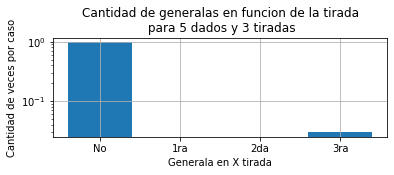

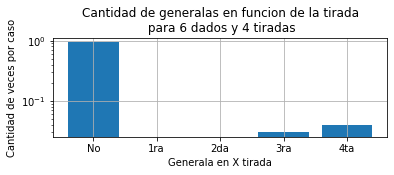

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#hice una forma rustica pero se puede mejorar el ir contando los casos
Gen1ra=0
Gen2da=0
Gen3ra=0
Gen4ta=0
NoGen=0
plt.figure()
plt.subplot(211)
for i in range(100):
  tiradas, tirada_exitosa=jugar(3, 5)
  if np.bitwise_and(tiradas[2,:] != np.zeros((1,5)), len(set(tiradas[2,:]))!= 1)[0,0]:
    NoGen+=1
    #print('sin generala')
    #la condicion pide que la 3ra fila de tiradas sea distinta de cero y no haya un unico valor del conjunto en la 3ra fila
  elif np.bitwise_and((tiradas[2,:] != np.zeros((1,5))),(len(set(tiradas[2,:])) == 1))[0,0]:
    Gen3ra+=1
    #print('generala en 3ra tirada')
    #la condicion pide que la 3ra fila de tiradas sea distinta de cero y haya un unico valor del conjunto en la 3ra fila
  elif np.bitwise_and((tiradas[2,:] == np.zeros((1,5))),(len(set(tiradas[1,:])) == 1))[0,0]:
    Gen2da+=1
    #print('generala en 2da tirada')
    #la condicion pide que la 3ra fila de tiradas sea cero y  haya un unico valor del conjunto en la 2da fila
  elif np.bitwise_and(tiradas[1,:] == np.zeros((1,5)),(len(set(tiradas[0,:])) == 1))[0,0]:
    Gen1ra+=1  
    #print('generala en 1ra tirada')
    #la condicion pide que la 2da fila de tiradas sea cero y  haya un unico valor del conjunto en la 1ra fila
  

PosibleGen=[NoGen,Gen1ra,Gen2da,Gen3ra]
total=NoGen+Gen1ra+Gen2da+Gen3ra
PosibleGen_per=[NoGen/total, Gen1ra/total,Gen2da/total,Gen3ra/total]
plt.bar([0,1,2,3],PosibleGen_per, width = 0.8,tick_label=['No','1ra','2da','3ra'])
plt.xlabel('Generala en X tirada')
plt.ylabel('Cantidad de veces por caso')
plt.yscale('log') #le puse esta forma de escala sino la grafica quedaba muy dispar entre las no generalas y las que si daban
plt.title('Cantidad de generalas en funcion de la tirada\n para 5 dados y 3 tiradas')
plt.grid()
plt.show()

plt.subplot(212)

Gen1ra=0
Gen2da=0
Gen3ra=0
Gen4ta=0
NoGen=0

for i in range(100):
  tiradas, tirada_exitosa=jugar(4, 6)
#  print(tiradas)
  #  print(tirada_exitosa)
  if np.bitwise_and((tiradas[3,:] != np.zeros((1,6))), (len(set(tiradas[3,:])) != 1))[0,0]:
    NoGen+=1
  elif np.bitwise_and((tiradas[3,:] != np.zeros((1,6))), (len(set(tiradas[3,:])) == 1))[0,0]:
    Gen4ta+=1
  elif np.bitwise_and(tiradas[3,:] == np.zeros((1,6)), (len(set(tiradas[2,:])) == 1))[0,0]:
    Gen3ra+=1
  elif np.bitwise_and(tiradas[2,:] == np.zeros((1,6)), (len(set(tiradas[1,:])) == 1))[0,0]:
    Gen2da+=1
  elif np.bitwise_and(tiradas[1,:] == np.zeros((1,6)), (len(set(tiradas[0,:])) == 1))[0,0]:
    Gen1ra+=1

total=NoGen+Gen1ra+Gen2da+Gen3ra+Gen4ta
PosibleGen=[NoGen,Gen1ra,Gen2da,Gen3ra,Gen4ta]
PosibleGen_per=[NoGen/total,Gen1ra/total,Gen2da/total,Gen3ra/total,Gen4ta/total]

plt.bar([0,1,2,3,4],PosibleGen_per, width = 0.8,tick_label=['No','1ra','2da','3ra','4ta'])
plt.xlabel('Generala en X tirada')
plt.ylabel('Cantidad de veces por caso')
plt.yscale('log')
plt.title('Cantidad de generalas en funcion de la tirada\n para 6 dados y 4 tiradas')
plt.grid()
plt.show()


 Con estas funciones, podrás responder varias preguntas, entre ellas:

    ¿Cuán probable es obtener una generala en la primera tirada?
    ¿Cuán probable es obtener una generala con dos tiradas?
    ¿Cuán probable es obtener una generala luego de las tres tiradas?
La probabilidad aumenta cuanto más tiradas uno haga. Por lo que sacar generala en la primera lanzada es muy poco probable.

    ¿Qué es más problable: obtener una generala con tres tiradas y cinco dados o cuatros tiradas y seis dados?
La probabilidad parece aumentar levemente cuanto más dados uno tiene para lanzar. Aunque la forma en que se distribuye la probabilidad es igual que lo anterior.

In [ ]:
#otras formas de hacer algunas cosas
#LAUTARO
#Para ver generala
arreglo=np.array([6,6,6,6])

for i in np.arange(1,7):
    if ((arreglo==i).sum()/arreglo.size)==1:
        print("Generala")


def es_generala(arreglo):
    booleano = False
    for i in np.arange(1,7):
        if ((arreglo==i).sum()/arreglo.size)==1:
            booleano=True
    return booleano
"""len(set(arreglo))==1  forma mas compacta"""

def seleccionar_mayoria(arreglo):
    a,b=np.unique(arreglo,return_counts=True)
    i=np.argmax(b)
    maximo=a[i]
    frecuencia=b[i]
    return maximo, frecuencia

print(arreglo)
a,b=np.unique(arreglo,return_counts=True)
i=np.argmax(b)




def jugar(n_tiradas = 3, dados_total= 5):
    # Numero de dados a tirar inicialmente
    n_dados = dados_total 
    
    # Dados en la mesa inicialmente
    dados_mesa = np.array([]) 
    
    # Donde guardamos las tiradas
    tiradas = np.zeros((n_tiradas,dados_total))
    
    # Numero de tirada exitosa, en la que se logra la generala
    # Inicializar en un valor que indique que NO se obtuvo generala.
    # Si luego se obtiene una generala, se modificará
    tirada_exitosa = -1
    
    # Contamos cuantas tiradas hicimos hasta ahora
    contador_tiradas = 0
    
    while (contador_tiradas < n_tiradas) and tirada_exitosa == -1:
        # Tiramos los dados
        dados_nuevos = tirar_n_dados(n_dados)
        
        # Combinamos los dados recien tirados con los que ya estan en la mesa
        todos_dados = np.concatenate((dados_mesa,dados_nuevos),axis=None)
        
        # Guardamos tirada
        tiradas[contador_tiradas,:] = todos_dados
        
        # Nos fijamos si es generala
        if es_generala(todos_dados):
            # Si es, modificamos el valor de tirada exitosa.
            # Esto debe cortar el loop.
            tirada_exitosa=contador_tiradas
        else:
            # Si no es generala, sigue tirando 
            # Se fija qué dados debe dejar en la mesa
            maximo, frecuencia = seleccionar_mayoria(todos_dados)
            dados_mesa = np.repeat(maximo, frecuencia)
            
            # Calcula cuántos dados volver a tirar
            n_dados = dados_total-dados_mesa.size
        
        # Suma al contador de tiradas
        contador_tiradas+=1
    return tiradas, tirada_exitosa


#ESTO QUERIA HACER PARA EL GRAFICO TOMAR EL VALOR DE TIRADA EXITOSA Y CONTAR.
#AUNQUE SOLO CUENTA CUANDO ES GENERALA NO LA TIRADA
exitos=0
n=20000
for i in range(n):
    tiradas, tirada_exitosa = jugar(4, 6)
    if tirada_exitosa >=0:
        exitos+=1
print(exitos/n)
for i in range(n):
    tiradas, tirada_exitosa = jugar(3, 5)
    if tirada_exitosa >=0:
        exitos+=1
print(exitos/n)


##JOAQUIN
import numpy as np
def es_generala(tirada):
  es = 1
  n = np.asarray(tirada).shape[0]
  for i in range(n):
    sig = i+1
    if i < n-1:
      if tirada[i] != tirada[sig]:
        es = 0
  return es
prueba = [5,5,5,5,5]
print(es_generala(prueba))
print(es_generala(tirada))






#Andres
def tirar_n_dados(n = 5):
    return random.randint(6, size=n)

def es_generala(dados):
    return len(set(dados)) == 1

dados = tirar_n_dados()
dados
np.unique(dados, return_counts=True)
def seleccionar_mayoria(dados):
    vals, frecuencia = np.unique(dados, return_counts=True)
    maximo = vals[np.where(frecuencia == max(frecuencia))][0]
    return maximo, max(frecuencia)


def jugar(n_tiradas = 3, dados_total= 5):
    # Numero de dados a tirar inicialmente
    n_dados = dados_total 
    
    # Dados en la mesa inicialmente
    dados_mesa = np.array([]) 
    
    # Donde guardamos las tiradas
    tiradas = {}
    
    # Numero de tirada exitosa, en la que se logra la generala
    # Inicializar en un valor que indique que NO se obtuvo generala.
    # Si luego se obtiene una generala, se modificará
    tirada_exitosa = -1
    
    # Contamos cuantas tiradas hicimos hasta ahora
    contador_tiradas = 0
    
    while (contador_tiradas < n_tiradas) and tirada_exitosa == -1:
        # Tiramos los dados
        dados_nuevos = tirar_n_dados(n = n_dados)
        
        # Combinamos los dados recien tirados con los que ya estan en la mesa
        todos_dados = np.concatenate((dados_mesa, dados_nuevos))
        
        
        #todos_dados = np.concatenate((dados_mesa, dados_nuevos),axis=None)  algo nuevo el axis none
        
        # Guardamos tirada
        tiradas[contador_tiradas] = dados_nuevos
        
        # Nos fijamos si es generala
        if es_generala(todos_dados):
            # Si es, modificamos el valor de tirada exitosa.
            # Esto debe cortar el loop.
            tirada_exitosa = 0
        else:
            # Si no es generala, sigue tirando 
            # Se fija qué dados debe dejar en la mesa
            maximo, frecuencia = seleccionar_mayoria(todos_dados)
            dados_mesa = np.repeat(maximo, frecuencia)
            
            # Calcula cuántos dados volver a tirar
            n_dados = 5 - len(dados_mesa)
        
        # Suma al contador de tiradas
        contador_tiradas = contador_tiradas + 1
    return tiradas, tirada_exitosa

for i in range(200):
    tiradas, tirada_exitosa = jugar(3, 5)
    if tirada_exitosa >=0:
        print(tiradas, tirada_exitosa)
        



#ABEL
def seleccionar_mayoria(dados):
    d,q = np.unique(dados,return_counts=True)
    return d[np.argmax(q)], q[np.argmax(q)]

